In [4]:
pip install prophet psycopg2-binary

  Using cached psycopg2_binary-2.9.9-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl.metadata (4.4 kB)
Using cached psycopg2_binary-2.9.9-cp311-cp311-manylinux_2_17_aarch64.manylinux2014_aarch64.whl (2.9 MB)
Note: you may need to restart the kernel to use updated packages.


In [43]:
import pandas as pd
from prophet import Prophet
%matplotlib widget


import matplotlib.pyplot as plt


from sqlalchemy import create_engine

# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')


In [44]:
# Query to fetch data from your table
query = 'SELECT timestamp, count() FROM github_events sample by 1m'

# Read data into a Pandas DataFrame
df = pd.read_sql(query, engine)

In [45]:
# Data exploration (modify as needed)
print(df.head())
#df['timestamp'] = pd.to_datetime(df['timestamp'])
#df.set_index('timestamp', inplace=True)
#print(df.resample('D').count().head())  # Example: count events per day
df.columns = [ 'ds', 'y']
df

                   timestamp  count
0 2024-01-30 09:15:14.855201    180
1 2024-01-30 09:16:14.855201    180
2 2024-01-30 09:17:14.855201    180
3 2024-01-30 09:18:14.855201    150
4 2024-01-30 09:19:14.855201    180


,ds,y
0,2024-01-30 09:15:14.855201,180
1,2024-01-30 09:16:14.855201,180
2,2024-01-30 09:17:14.855201,180
3,2024-01-30 09:18:14.855201,150
4,2024-01-30 09:19:14.855201,180
5,2024-01-30 09:20:14.855201,180
6,2024-01-30 09:21:14.855201,180
7,2024-01-30 09:22:14.855201,150
8,2024-01-30 09:23:14.855201,180
9,2024-01-30 09:24:14.855201,180


In [46]:
# Creating and fitting the Prophet model
model = Prophet()
model.fit(df)

09:28:38 - cmdstanpy - INFO - Chain [1] start processing
09:28:38 - cmdstanpy - INFO - Chain [1] done processing


In [47]:
# Making future predictions
#future = model.make_future_dataframe(periods=30)  # Predicting 30 days into the future
future = model.make_future_dataframe(periods=10, freq='T')
forecast = model.predict(future)

/opt/conda/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/conda/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


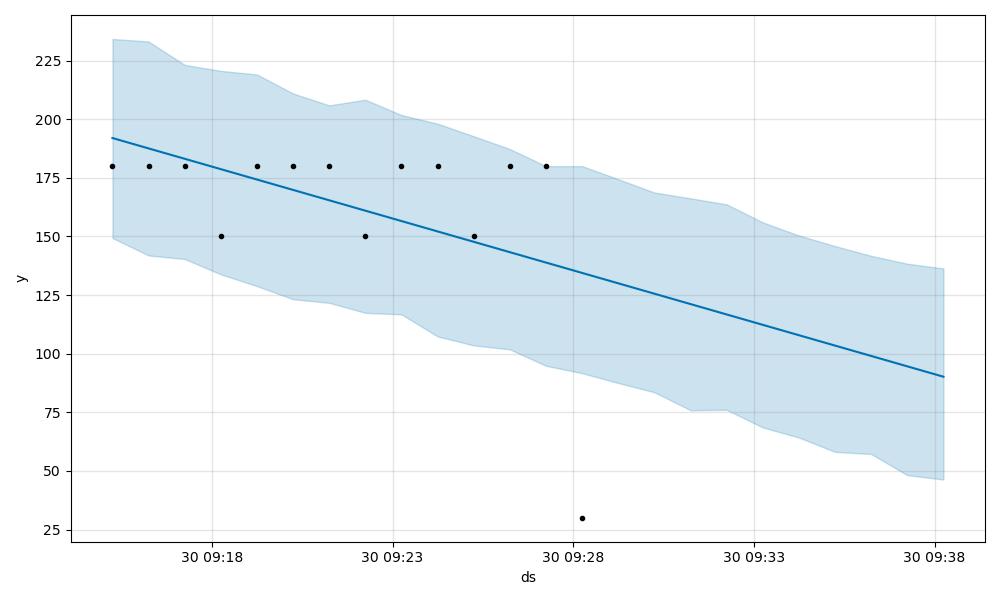

In [48]:
# Plotting the forecast
model.plot(forecast)
plt.show()

In [55]:
%matplotlib widget

from sqlalchemy import create_engine
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Database connection details
db_config = {
    'user': 'admin',
    'password': 'quest',
    'host': 'questdb',
    'port': 8812, 
    'database': 'qdb'
}

# Create a database connection
engine = create_engine(f'postgresql://{db_config["user"]}:{db_config["password"]}@{db_config["host"]}:{db_config["port"]}/{db_config["database"]}')

# SQL query to retrieve data from the "github_events" table with downsampling
query = 'SELECT timestamp, count() FROM github_events sample by 1m'

# Execute the query and fetch data into a DataFrame
df = pd.read_sql(query, engine)

# Data preprocessing
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

In [39]:
# Create feature (X) and target (y) datasets
X = df.index.to_julian_date().values.reshape(-1, 1)
y = df['count'].values

# Create and fit a Linear Regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

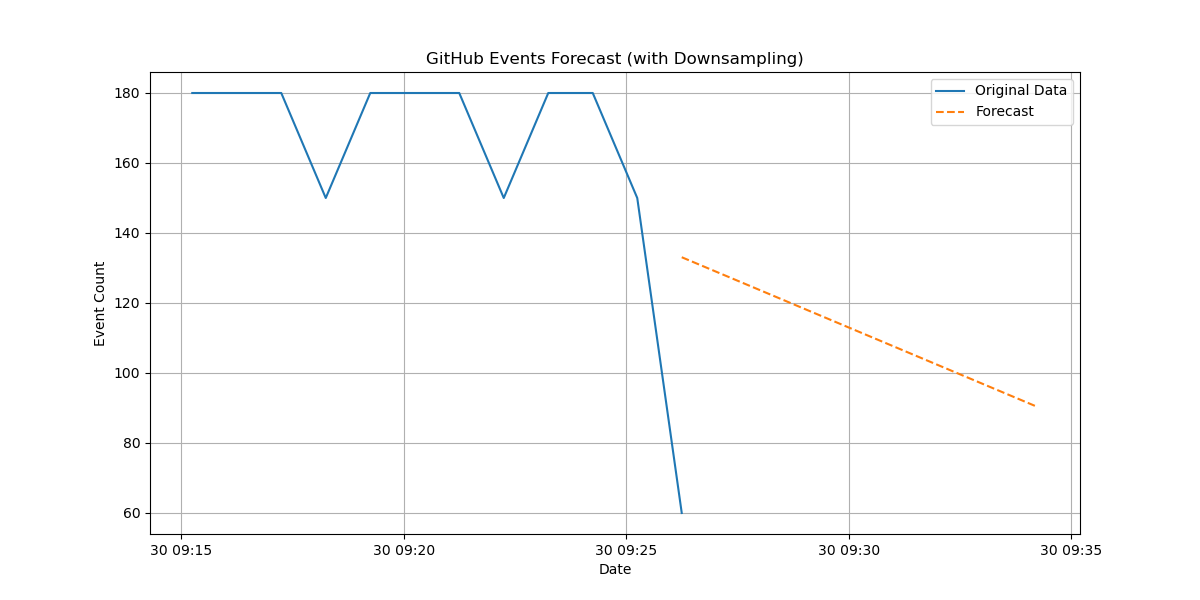

In [40]:
# Predict future values
future_minutes = 10 #30 * 24 * 60  # Number of minutes to forecast (30 days)
future_dates = pd.date_range(start=df.index[-1], periods=future_minutes, freq='T')
future_dates_jd = future_dates.to_julian_date().values.reshape(-1, 1)
future_forecast = model.predict(future_dates_jd)

# Exclude the last known date from the forecast
future_dates = future_dates[:-1]
future_forecast = future_forecast[:-1]

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], label='Original Data')
plt.plot(future_dates, future_forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.title('GitHub Events Forecast (with Downsampling)')
plt.legend()
plt.grid()
plt.show()

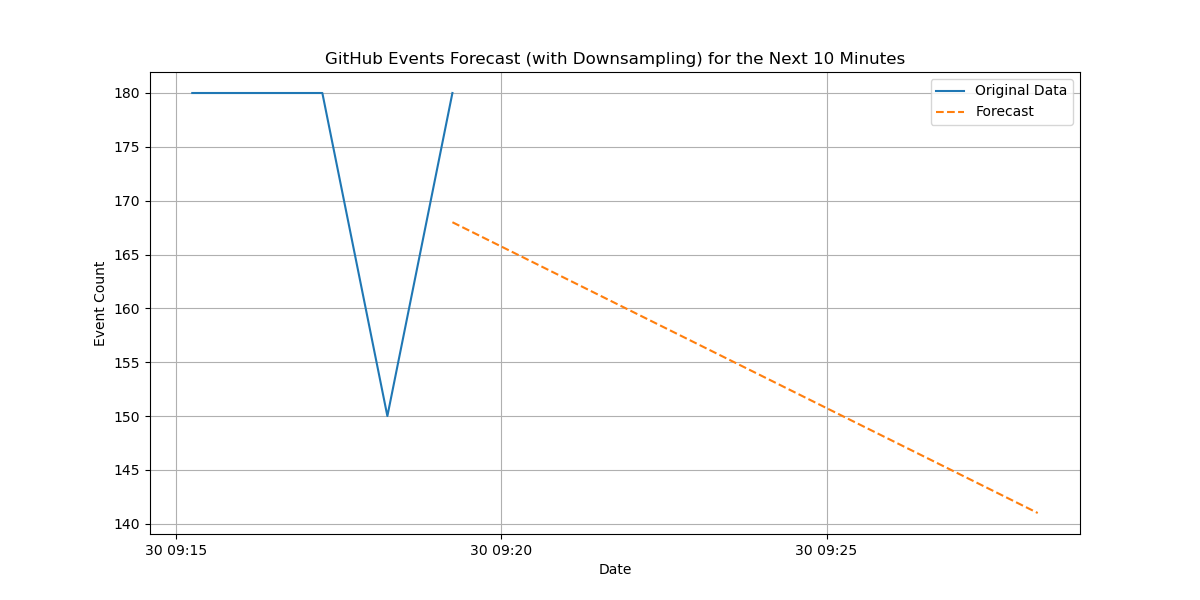

In [28]:
# Predict future values for the next 10 minutes
future_minutes = 10
future_dates = pd.date_range(start=df.index[-1], periods=future_minutes, freq='T')
future_dates_jd = future_dates.to_julian_date().values.reshape(-1, 1)
future_forecast = model.predict(future_dates_jd)

# Plot the original data and the forecast for the next 10 minutes
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['count'], label='Original Data')
plt.plot(future_dates, future_forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Event Count')
plt.title('GitHub Events Forecast (with Downsampling) for the Next 10 Minutes')
plt.legend()
plt.grid()
plt.show()

In [56]:
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator

query = 'SELECT * FROM github_events '

# Execute the query and fetch data into a DataFrame
df = pd.read_sql(query, engine)


proto = GenericFeatureStatisticsGenerator().ProtoFromDataFrames([{'name': 'test', 'table': df}])

In [53]:
pip install facets-overview

Note: you may need to restart the kernel to use updated packages.
